In [1]:
#importing pandas for processing the data
import pandas as pd
# importing preprocessing libraries, classifiers
import numpy as np
#Importing time for caluclating latency
import time
#importing logistic regression 
from sklearn.linear_model import LogisticRegression
#importing train_test_split for splitting training and testing data
from sklearn.model_selection import train_test_split
#importing kfold for performing cross validation
from sklearn.model_selection import KFold
#importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier
#importing gridsearch to perform gridsearch
from sklearn.model_selection import GridSearchCV
# used for feature scaling
from sklearn.preprocessing import StandardScaler
#to caluclate precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score, accuracy_score
#used for encoding categorical data
from sklearn.preprocessing import LabelEncoder
#Caluclating the accuracy
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
ds = pd.read_csv("D:\AI\Machine Learning Frameworks - AIDI1003/iris.csv")

In [3]:
# Printing the first 5 rows of the csv file
ds.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
#Getting the shape of the dataset
ds.shape

(150, 5)

In [5]:
#Getting the information of coloumns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Getting the statistical details of the dataset
stats = ds.describe()
stats

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking for the null values in the dataset
ds.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
#Checking for the duplicate values in the dataset
data = ds.drop_duplicates(subset ="variety",)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


In [9]:
#Checking the rows count
ds.value_counts("variety")

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [10]:
#calculating the median of each variety
x = ds.groupby('variety').median()
x

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.0,3.4,1.50,0.2
Versicolor,5.9,2.8,4.35,1.3
Virginica,6.5,3.0,5.55,2.0


In [11]:
#caluclating the range and moving coloumns of mean, median into a data frame
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_ds = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_ds.rename({'50%': 'median'}, inplace=True)
new_ds

,sepal.length,sepal.width,petal.length,petal.width
mean,5.843333,3.057333,3.758,1.199333
range,3.600000,2.400000,5.900,2.400000
25%,5.100000,2.800000,1.600,0.300000
median,5.800000,3.000000,4.350,1.300000
75%,6.400000,3.300000,5.100,1.800000


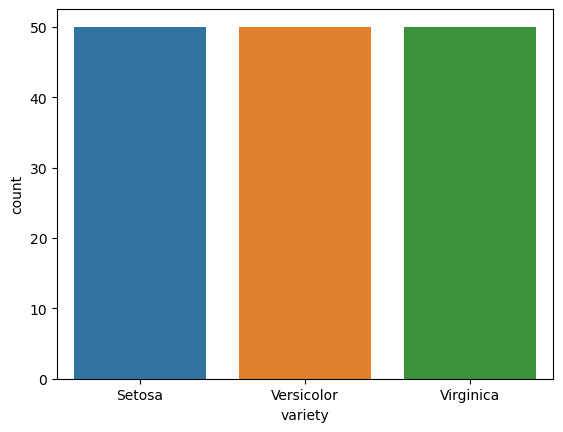

In [12]:
#Visualisation of Data
# importing packages required
%matplotlib inline

sns.countplot(x='variety', data=ds, )
plt.show()

In [ ]:
#In the above histogam you can see all the count of setosa, versicolor and virginica

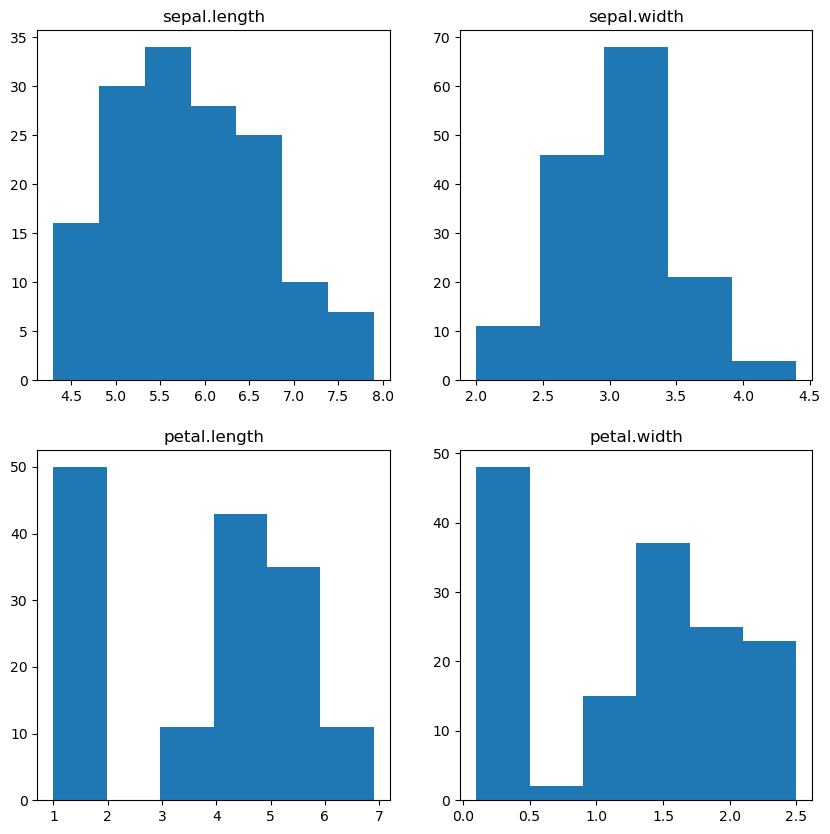

In [13]:
#Exploring the features of the dataset using Histograms
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("sepal.length")
axes[0,0].hist(ds['sepal.length'], bins=7)

axes[0,1].set_title("sepal.width")
axes[0,1].hist(ds['sepal.width'], bins=5);

axes[1,0].set_title("petal.length")
axes[1,0].hist(ds['petal.length'], bins=6);

axes[1,1].set_title("petal.width")
axes[1,1].hist(ds['petal.width'], bins=6);


In [ ]:
#The above histograms are for evaluating the sepal.lenght, sepal.width, petal.length and petal.width

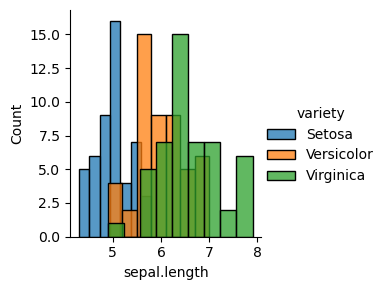

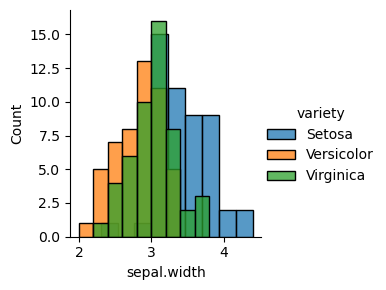

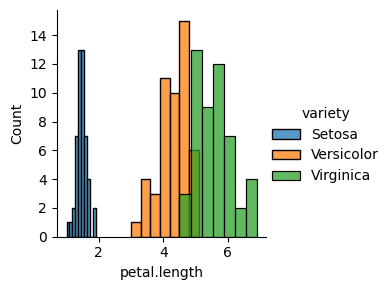

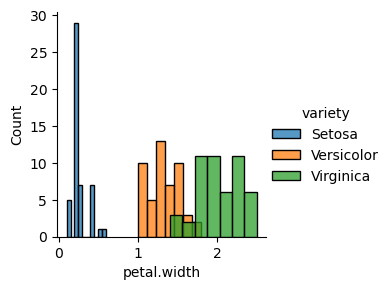

In [14]:
#Histograms with displot to depict the variation in data distribution
plot = sns.FacetGrid(ds, hue="variety")
plot.map(sns.histplot, "sepal.length").add_legend()

plot = sns.FacetGrid(ds, hue="variety")
plot.map(sns.histplot, "sepal.width").add_legend()

plot = sns.FacetGrid(ds, hue="variety")
plot.map(sns.histplot, "petal.length").add_legend()

plot = sns.FacetGrid(ds, hue="variety")
plot.map(sns.histplot, "petal.width").add_legend()

plt.show()


In [ ]:
#in the above histograms we can observe all the varietys distribution of data.

In [15]:
#Encoding target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#creating instance of a label encoder
encode = LabelEncoder()

In [16]:
#Assigning numerical values and storing in the same name column 'variety'
ds['variety'] = le.fit_transform(ds['variety'])
ds.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Splitting the dataset into the Training, Test and validation set
X = ds.drop(columns=['variety'])
Y = ds['variety']
X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [18]:
#Splitting dataset with a ratio of 60% for training, 20% for validation, and 20% for testing
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Verify the shapes of the resulting sets
print("Training set shape: ", X_train.shape, y_train.shape)
print("Validation set shape: ", X_val.shape, y_val.shape)
print("Test set shape: ", X_test.shape, y_test.shape)

Training set shape:  (90, 4) (90,)
Validation set shape:  (30, 4) (30,)
Test set shape:  (30, 4) (30,)


In [19]:
#Performing random forest algorirhthm
# Defining the hyperparameters grid
param_grid = {"n_estimators": [5, 10, 15, 20, 25],"max_depth": [3, 5, 7, 9, None],"criterion": ["gini", "entropy"]}

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Perform k-fold cross validation and grid search to find the optimal hyperparameters
kfold = KFold(n_splits=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold)
start = time.time()
grid_search.fit(X_train, y_train)

#Caluclating latency
latency = time.time() - start

# Get the best hyperparameters and the best estimator using grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict the target values for the test set
y_pred_test = best_estimator.predict(X_test)

# Get the predictions for the validation set
y_val_pred = best_estimator.predict(X_val)

#Caluclating precision, recall, accuracy for test data
precision_rf_test = precision_score(y_test, y_pred_test, average='weighted')
recall_rf_test = recall_score(y_test, y_pred_test, average='weighted')
accuracy_rf_test = accuracy_score(y_test, y_pred_test)

#Caluclating precision, recall, accuracy for validation data
precision_rf_val = precision_score(y_val, y_val_pred, average='weighted')
recall_rf_val = recall_score(y_val, y_val_pred, average='weighted')
accuracy_rf_val = accuracy_score(y_val, y_val_pred)

print(f"Best hyperparameters: {best_params}")
print(f"Test Precision: {precision_rf_test:.3f}")
print(f"Test Recall: {recall_rf_test:.3f}")
print(f"Test Accuracy: {accuracy_rf_test:.3f}")
print(f"Latency: {latency:.3f}")

print(f"Validation Precision: {precision_rf_val:.3f}")
print(f"Validation Recall: {recall_rf_val:.3f}")
print(f"Validation Accuracy: {accuracy_rf_val:.3f}")
print(f"Latency: {latency:.3f}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 15}
Test Precision: 0.877
Test Recall: 0.867
Test Accuracy: 0.867
Latency: 2.633
Validation Precision: 1.000
Validation Recall: 1.000
Validation Accuracy: 1.000
Latency: 2.633


In [20]:
# Defining the hyperparameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l2']}

# Defining the Logistic Regression model
#max_iter parameter is set to 10000 so that it will allow to increase the maximum number of iterations.
log_reg = LogisticRegression(max_iter=10000)

# Creating the K-Fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True)

# Conduct Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X, Y)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Getting the best logistic regression model
best_log_reg = grid_search.best_estimator_

# Evaluating the model's accuracy
accuracy = grid_search.score(X, Y)

# Predicting the target values for the test set
pred_test = best_estimator.predict(X_test)

# Getting inferential predictions for the validation dataset
val_preds = grid_search.predict(X_val)

#Caluclating precision, recall, accuracy for test data
precision_lr_test = precision_score(y_test, pred_test, average='weighted')
recall_lr_test = recall_score(y_test, pred_test, average='weighted')
accuracy_lr_test = accuracy_score(y_test, pred_test)

#Caluclating precision, recall, accuracy for validation data
precision_lr_val = precision_score(y_val, val_preds, average='weighted')
recall_lr_val = recall_score(y_val, val_preds, average='weighted')
accuracy_lr_val = accuracy_score(y_val, val_preds)

# Measuring the latency of the model
start_time = time.time()
best_log_reg.predict(X_test)
latency = time.time() - start_time

print(f"Best hyperparameters: {best_params}")
print(f"Test Precision: {precision_lr_test:.3f}")
print(f"Test Recall: {recall_lr_test:.3f}")
print(f"Test Accuracy: {accuracy_lr_test:.3f}")
print(f"Latency: {latency:.3f}")

print(f"Validation Precision: {precision_lr_val:.3f}")
print(f"Validation Recall: {recall_lr_val:.3f}")
print(f"Validation Accuracy: {accuracy_lr_val:.3f}")
print(f"Latency: {latency:.3f}")

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Test Precision: 0.877
Test Recall: 0.867
Test Accuracy: 0.867
Latency: 0.001
Validation Precision: 1.000
Validation Recall: 1.000
Validation Accuracy: 1.000
Latency: 0.001


In [21]:
from sklearn.svm import SVC
# Define the k-fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True)

# Define the grid of hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Create an instance of the SVM classifier
svm = SVC(kernel='rbf')

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kfold, n_jobs=-1)

# Train the model using grid search
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

# Measuring the latency of the model
latency = end - start

# Predict on the test set
y_preds = grid_search.predict(X_test)

# Predict on the validation set
y_val_preds = grid_search.predict(X_val)


#Caluclating precision, recall, accuracy for test data
precision_svm_test = precision_score(y_test, y_preds, average='weighted')
recall_svm_test = recall_score(y_test, y_preds, average='weighted')
accuracy_svm_test = accuracy_score(y_test, y_preds)


#Caluclating precision, recall, accuracy for validation data
precision_svm_val = precision_score(y_val, y_val_preds, average='weighted')
recall_svm_val = recall_score(y_val, y_val_preds, average='weighted')
accuracy_svm_val = accuracy_score(y_val, y_val_preds)

print(f"Best hyperparameters: {best_params}")
print(f"Test Precision: {precision_svm_test:.3f}")
print(f"Test Recall: {recall_svm_test:.3f}")
print(f"Test Accuracy: {accuracy_svm_test:.3f}")
print(f"Latency: {latency:.3f}")

print(f"Validation Precision: {precision_svm_val:.3f}")
print(f"Validation Recall: {recall_svm_val:.3f}")
print(f"Validation Accuracy: {accuracy_svm_val:.3f}")
print(f"Latency: {latency:.3f}")

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Test Precision: 0.970
Test Recall: 0.967
Test Accuracy: 0.967
Latency: 5.825
Validation Precision: 1.000
Validation Recall: 1.000
Validation Accuracy: 1.000
Latency: 5.825


In [22]:
#Comparing the test data results and validation data results for 60, 20, 20 ratio

#When it comes to random forest and SVM model test data got more accuracy than validation data but with logistic regression validation data results are slightly higher

In [23]:
#Comparing the accuracy, precision and recall for test data 60, 20, 20 ratio

#When we compare the test data results of 3 models that is Random forest, Logistic regression and SVM we can see that the results are approximately equal for three models but SVM model got bit higher accuracy and precision, so for test data SVM model is performing good and when it comes to latency logistic regression is very fast.

In [24]:
#Comparing the accuracy, precision and recall for Validation data 60, 20, 20 ratio

#When we compare the validation data results of 3 models that is Random forest, Logistic regression and SVM we can see that the results are approximately equal for three models but logistic regression model got bit higher accuracy and precision, so for validation data SVM model is performing good and when it comes to latency logistic regression is very fast.

In [25]:
#Splitting dataset with a ratio of 80% for training, 10% for validation, and 10% for testing
# Split the data into 80% training and 20% validation and testing
X_train1, X_val1_and_test1, y_train1, y_val1_and_test1 = train_test_split(X, Y, test_size=0.2)

# Split the 20% validation and testing data into 10% validation and 10% testing
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_val1_and_test1, y_val1_and_test1, test_size=0.5)

# Verify the shapes of the resulting sets
print("Training set shape: ", X_train1.shape, y_train1.shape)
print("Validation set shape: ", X_val1.shape, y_val1.shape)
print("Test set shape: ", X_test1.shape, y_test1.shape)

Training set shape:  (120, 4) (120,)
Validation set shape:  (15, 4) (15,)
Test set shape:  (15, 4) (15,)


In [26]:
#Performing random forest algorirhthm
# Defining the hyperparameters grid
param_grid = {"n_estimators": [5, 10, 15, 20, 25],"max_depth": [3, 5, 7, 9, None],"criterion": ["gini", "entropy"]}

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Perform k-fold cross validation and grid search to find the optimal hyperparameters
kfold = KFold(n_splits=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold)
start = time.time()
grid_search.fit(X_train1, y_train1)

# Measuring the latency of the model
latency = time.time() - start

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict the target values for the test set
y_pred_test1 = best_estimator.predict(X_test1)

# Get the predictions for the validation set
y_val1_pred = best_estimator.predict(X_val1)

#Caluclating precision, recall, accuracy for test data
precision_test1 = precision_score(y_test1, y_pred_test1, average='weighted')
recall_test1 = recall_score(y_test1, y_pred_test1, average='weighted')
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)

#Caluclating precision, recall, accuracy for validation data
precision_val1 = precision_score(y_val1, y_val1_pred, average='weighted')
recall_val1 = recall_score(y_val1, y_val1_pred, average='weighted')
accuracy_val1 = accuracy_score(y_val1, y_val1_pred)

print(f"Best hyperparameters: {best_params}")
print(f"Test Precision: {precision_test1:.3f}")
print(f"Test Recall: {recall_test1:.3f}")
print(f"Test Accuracy: {accuracy_test1:.3f}")
print(f"Latency: {latency:.3f}")

print(f"Validation Precision: {precision_val1:.3f}")
print(f"Validation Recall: {recall_val1:.3f}")
print(f"Validation Accuracy: {accuracy_val1:.3f}")
print(f"Latency: {latency:.3f}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 5}
Test Precision: 0.947
Test Recall: 0.933
Test Accuracy: 0.933
Latency: 7.723
Validation Precision: 0.944
Validation Recall: 0.933
Validation Accuracy: 0.933
Latency: 7.723


In [27]:
# Define the hyperparameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l2']}

# Define the Logistic Regression model
#max_iter parameter is set to 10000 so that it will allow to increase the maximum number of iterations.
log_reg = LogisticRegression(max_iter=10000)

# Create the K-Fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True)

# Conduct Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X, Y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best logistic regression model
best_log_reg = grid_search.best_estimator_

# Evaluate the model's accuracy
accuracy = grid_search.score(X, Y)

# Predict the target values for the test set
pred_test1 = best_estimator.predict(X_test1)

# Getting inferential predictions for the validation dataset
val1_preds = grid_search.predict(X_val1)

#Caluclating precision, recall, accuracy for test data
precision_test1 = precision_score(y_test1, pred_test1, average='weighted')
recall_test1 = recall_score(y_test1, pred_test1, average='weighted')
accuracy_test1 = accuracy_score(y_test1, pred_test1)

#Caluclating precision, recall, accuracy for validation data
precision_val1 = precision_score(y_val1, val1_preds, average='weighted')
recall_val1 = recall_score(y_val1, val1_preds, average='weighted')
accuracy_val1 = accuracy_score(y_val1, val1_preds)

# Measuring the latency of the model
start_time = time.time()
best_log_reg.predict(X_test1)
latency = time.time() - start_time

print(f"Best hyperparameters: {best_params}")
print(f"Test Precision: {precision_test1:.3f}")
print(f"Test Recall: {recall_test1:.3f}")
print(f"Test Accuracy: {accuracy_test1:.3f}")
print(f"Latency: {latency:.3f}")

print(f"Validation Precision: {precision_val1:.3f}")
print(f"Validation Recall: {recall_val1:.3f}")
print(f"Validation Accuracy: {accuracy_val1:.3f}")
print(f"Latency: {latency:.3f}")

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Test Precision: 0.947
Test Recall: 0.933
Test Accuracy: 0.933
Latency: 0.002
Validation Precision: 0.944
Validation Recall: 0.933
Validation Accuracy: 0.933
Latency: 0.002


In [28]:
from sklearn.svm import SVC
# Define the k-fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True)

# Define the grid of hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Create an instance of the SVM classifier
svm = SVC(kernel='rbf')

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kfold, n_jobs=-1)

# Train the model using grid search
start = time.time()
grid_search.fit(X_train1, y_train1)
end = time.time()
# Measuring the latency of the model
latency = end - start

# Predict on the test set
y_preds1 = grid_search.predict(X_test1)

# Predict on the validation set
y_val1_preds = grid_search.predict(X_val1)

#Caluclating precision, recall, accuracy for test data
precision_test1 = precision_score(y_test1, y_preds1, average='weighted')
recall_test1 = recall_score(y_test1, y_preds1, average='weighted')
accuracy_test1 = accuracy_score(y_test1, y_preds1)

#Caluclating precision, recall, accuracy for validation data
precision_val1 = precision_score(y_val1, y_val1_preds, average='weighted')
recall_val1 = recall_score(y_val1, y_val1_preds, average='weighted')
accuracy_val1 = accuracy_score(y_val1, y_val1_preds)

print(f"Best hyperparameters: {best_params}")
print(f"Test Precision: {precision_test1:.3f}")
print(f"Test Recall: {recall_test1:.3f}")
print(f"Test Accuracy: {accuracy_test1:.3f}")
print(f"Latency: {latency:.3f}")

print(f"Validation Precision: {precision_val1:.3f}")
print(f"Validation Recall: {recall_val1:.3f}")
print(f"Validation Accuracy: {accuracy_val1:.3f}")
print(f"Latency: {latency:.3f}")

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Test Precision: 0.947
Test Recall: 0.933
Test Accuracy: 0.933
Latency: 0.179
Validation Precision: 0.944
Validation Recall: 0.933
Validation Accuracy: 0.933
Latency: 0.179


In [29]:
#Comparing the test data results and validation data results for 60, 20, 20 ratio

#In this raito validation data got higher accuracy for the three models when compared to the test data

In [30]:
#Comparing the accuracy, precision and recall for test data for 80, 10, 10 ratio

#When we compare the test data results of 3 models that is Random forest, Logistic regression and SVM we can see that the results are approximately equal for three models but SVM model got bit higher accuracy and precision, so for test data SVM model is performing good and when it comes to latency logistic regression is very fast.

In [31]:
#Comparing the accuracy, precision and recall for validation data for 80, 10, 10 ratio

#When we compare the validation data results of 3 models that is Random forest, Logistic regression and SVM we can see that the results are approximately equal for three models but SVM, random forest models got bit higher accuracy and precision, so for validation data SVM model and random forest model is performing good and when it comes to latency logistic regression is very fast.

In [32]:
#Comparing ratios 60,20,20 : 80,10,10

#When compared with the ratios the results for test data when split into 60,20,20 got better results than compared to the 80,10,10 split but when it comes to validation data results 80,10,10 split got better results. Totally it depends on the trainig of the model and for this data sets from the above results 60,20,20 ratio performed slightly better than 80,10,10 ratio.